In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('D:/project/project marketing sales/marketing/data/marketing_data.csv')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 2240 non-null   int64 
 1   Year_Birth         2240 non-null   int64 
 2   Education          2240 non-null   object
 3   Marital_Status     2240 non-null   object
 4    Income            2216 non-null   object
 5   Dt_Customer        2240 non-null   object
 6   Recency            2240 non-null   int64 
 7   MntWines           2240 non-null   int64 
 8   MntFruits          2240 non-null   int64 
 9   MntMeatProducts    2240 non-null   int64 
 10  MntFishProducts    2240 non-null   int64 
 11  NumWebPurchases    2240 non-null   int64 
 12  NumWebVisitsMonth  2240 non-null   int64 
 13  AcceptedCmp3       2240 non-null   int64 
 14  AcceptedCmp4       2240 non-null   int64 
 15  AcceptedCmp5       2240 non-null   int64 
 16  AcceptedCmp1       2240 non-null   int64 


In [4]:
df.columns = df.columns.str.strip()

C:\Users\DELL\AppData\Local\Temp/ipykernel_12704/581589600.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[(df.Education=='PhD')&(df.Income.notna())].Income.str.replace("$", "").str.replace(",", "").str.strip().astype('float64').plot.hist()


<AxesSubplot:ylabel='Frequency'>

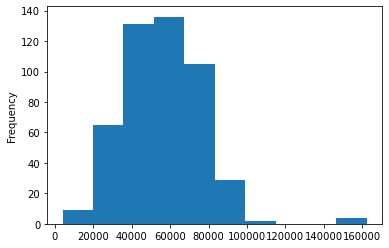

In [5]:
df[(df.Education=='PhD')&(df.Income.notna())].Income.str.replace("$", "").str.replace(",", "").str.strip().astype('float64').plot.hist()

C:\Users\DELL\AppData\Local\Temp/ipykernel_12704/1402157668.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  (df[mask]


<AxesSubplot:ylabel='Frequency'>

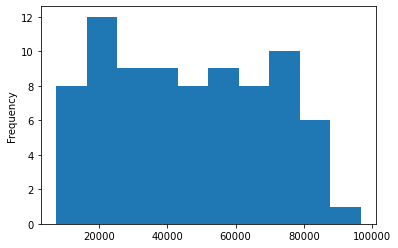

In [6]:
mask = (df.Education=='2n Cycle')&(df.Marital_Status=='Married')&(df.Income.notna())
(df[mask]
     .Income
     .str
     .replace("$", "")
     .str
     .replace(",", "")
     .str
     .strip()
     .astype('float64')
     .plot
     .hist()
#      .median()
)

In [53]:
df.loc[134, 'Education']

'PhD'

In [54]:
df.loc[134, 'Marital_Status']

'Married'

In [7]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,1826,1970,Graduation,Divorced,"$84,835.00",6/16/14,0,189,104,379,111,4,1,0,0,0,0,0
1,1,1961,Graduation,Single,"$57,091.00",6/15/14,0,464,5,64,7,7,5,0,0,0,0,1
2,10476,1958,Graduation,Married,"$67,267.00",5/13/14,0,134,11,59,15,3,2,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",5/11/14,0,10,0,1,0,1,7,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",4/8/14,0,6,16,24,11,3,7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",3/7/13,99,372,18,126,47,5,4,0,0,0,0,0
2236,5263,1977,2n Cycle,Married,"$31,056.00",1/22/13,99,5,10,13,3,1,8,0,0,0,0,0
2237,22,1976,Graduation,Divorced,"$46,310.00",12/3/12,99,185,2,88,15,6,8,0,0,0,0,0
2238,528,1978,Graduation,Married,"$65,819.00",11/29/12,99,267,38,701,149,5,3,0,0,0,0,0


In [8]:
def clean(data):
    data.columns = data.columns.str.strip()
    data.Dt_Customer = pd.to_datetime(data.Dt_Customer)
    
#     data.loc[data.Marital_Status == 'Alone', 'Marital_Status'] = 'Single'
#     data.loc[(data.Marital_Status == 'YOLO'), 'Marital_Status'] = 'Others'
#     data.loc[(data.Marital_Status == 'Absurd'), 'Marital_Status'] = 'Others'
    
    data.Income = (data
                       .Income
                       .str
                       .replace("$", "", regex=False)
                       .str
                       .replace(",", "", regex=False)
                       .str
                       .strip()
                       .astype('float64')
                  )
    
    idx = df[df.Income.isna()].index.tolist()
    for i in idx:
        mask = (data.Education== df.loc[i, 'Education'])&(df.Marital_Status==df.loc[i, 'Marital_Status'])&(df.Income.notna())
        val = (df[mask]
                   .Income
                   .median()
              )
        data.loc[i, 'Income'] = val
        
#     data.loc[data.Marital_Status == 'Alone', 'Marital_Status'] = 'Single'
#     data.loc[(data.Marital_Status == 'YOLO') & (data.Marital_Status == 'Absurd') , 'Marital_Status'] = 'Others'
        
    return data
    

In [9]:
qwe = df.pipe(clean)

In [24]:
qwe = qwe.assign(Total=(lambda x: x.MntWines + x.MntFruits+ x.MntMeatProducts+x.MntFishProducts))

In [38]:
qwe

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Total
0,1826,1970,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,111,4,1,0,0,0,0,0,783
1,1,1961,Graduation,Single,57091.0,2014-06-15,0,464,5,64,7,7,5,0,0,0,0,1,540
2,10476,1958,Graduation,Married,67267.0,2014-05-13,0,134,11,59,15,3,2,0,0,0,0,0,219
3,1386,1967,Graduation,Together,32474.0,2014-05-11,0,10,0,1,0,1,7,0,0,0,0,0,11
4,5371,1989,Graduation,Single,21474.0,2014-04-08,0,6,16,24,11,3,7,1,0,0,0,0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,2013-03-07,99,372,18,126,47,5,4,0,0,0,0,0,563
2236,5263,1977,2n Cycle,Married,31056.0,2013-01-22,99,5,10,13,3,1,8,0,0,0,0,0,31
2237,22,1976,Graduation,Divorced,46310.0,2012-12-03,99,185,2,88,15,6,8,0,0,0,0,0,290
2238,528,1978,Graduation,Married,65819.0,2012-11-29,99,267,38,701,149,5,3,0,0,0,0,0,1155


In [26]:
qwe[['Recency', 'NumWebPurchases', 'Total']].describe()

,Recency,NumWebPurchases,Total
count,2240.000000,2240.000000,2240.000000
mean,49.109375,4.084821,534.713393
std,28.962453,2.778714,552.988656
min,0.000000,0.000000,3.000000
25%,24.000000,2.000000,50.000000
50%,49.000000,4.000000,328.000000
75%,74.000000,6.000000,922.500000
max,99.000000,27.000000,2343.000000


In [ ]:
#r_score = recency score
#f_score = frequency score
#m_score = monatery score

def r_score(s):
    if s < 14: #bandingkan jika valuenya recencynya kurang dari 14 maka scorenya 5 dan seterusnya 
        return 5
    elif s>= 14 and s < 24:
        return 4
    elif s >= 24 and s < 49:
        return 3
    elif s >= 49 and s < 74:
        return 2
    else:
        return 1
    
def f_score(s):
    if s < 2: #bandingkan jika valuenya frequncynya kurang dari 2 maka scorenya 1 dan seterusnya 
        return 1
    elif s >= 2 and s < 5:
        return 2
    elif s >= 5 and s < 10:
        return 3
    elif s >= 10 and s < 20:
        return 4
    else:
        return 5
    
def m_score(s):
    if s < 50: #bandingkan jika valuenya monatery kurang dari $50 maka scorenya 1 dan seterusnya
        return 1
    elif s >= 50 and s < 200:
        return 2
    elif s >= 200 and s <600:
        return 3
    elif s >= 600 and s < 900:
        return 4
    else:
        return 5

def segmen(data):
    if data.r_score >=4 and data.f_score >=4 and data.m_score >=4:
        return "Champions"
    
    elif (data.r_score >= 2 and data.r_score <= 5) and (data.f_score >= 3 and data.f_score <= 5) 
            and (data.m_score >= 3 and data.m_score <= 5):
        return "Loyal Customers"
    
    elif (data.r_score >= 3 and data.r_score <= 5) and (data.f_score >= 1 and data.f_score <= 3) 
            and (data.m_score >= 1 and data.m_score <= 3):
        return "Potential Loyalist"
    
    elif (data.r_score >= 4 and data.r_score <= 5) and (data.f_score <= 1) 
            and (data.m_score <= 1):
        return "Recent Cusotmers"
    
    elif (data.r_score >= 3 and data.r_score <= 4) and (data.f_score <= 1) and (data.m_score <= 1):
        return "Promising"
    
    elif (data.r_score >= 2 and data.r_score <= 3) and (data.f_score >= 2 and data.f_score <= 3) 
            and (data.m_score >= 2 and data.m_score <= 3):
        return "Customer Needing Attention"
    
    elif (data.r_score >= 2 and data.r_score <= 3) and (data.f_score <= 2) 
            and (data.m_score <= 2):
        return "About To Sleep"
    
    elif (data.r_score <= 2) and (data.f_score >= 2 and data.f_score <= 5) and (data.m_score >= 2 and data.m_score <= 5):
        return "At Risk"
    
    elif (data.r_score <= 1) and (data.f_score >= 4 and data.f_score <= 5) and (data.m_score >= 4 and data.m_score <= 5):
        return "Can't Lose Them"
    
    elif (data.r_score >= 1 and data.r_score <= 2) and (data.f_score >= 1 and data.f_score <= 2) and (data.m_score >= 1 
            and data.m_score <= 2):
        return "Hibernating"
    
    elif (data.r_score <= 2) and (data.f_score <= 2) and (data.m_score <= 2):
        return "Lost"

In [50]:
qwe=(qwe
         .assign(r_score=(lambda x: x.Recency.apply(r_score)),
                 f_score=(lambda x: x.NumWebPurchases.apply(f_score)),
                 m_score=(lambda x: x.Total.apply(m_score)),
                 Customer_Segment=(lambda x: x.apply(segmen, axis=1))
                  )
    )

In [64]:
index = qwe[qwe.Customer_Segment.isna()].index.to_list()
pl = index[:-2]
risk = index[-2:]

In [68]:
qwe.loc[pl, 'Customer_Segment'] = "Potential Loyalist"
qwe.loc[risk, 'Customer_Segment'] = "At Risk"

In [87]:
qwe

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,NumWebPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Total,r_score,f_score,m_score,Customer_Segment
0,1826,1970,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,111,4,1,0,0,0,0,0,783,5,2,4,Potential Loyalist
1,1,1961,Graduation,Single,57091.0,2014-06-15,0,464,5,64,7,7,5,0,0,0,0,1,540,5,3,3,Loyal Customers
2,10476,1958,Graduation,Married,67267.0,2014-05-13,0,134,11,59,15,3,2,0,0,0,0,0,219,5,2,3,Potential Loyalist
3,1386,1967,Graduation,Together,32474.0,2014-05-11,0,10,0,1,0,1,7,0,0,0,0,0,11,5,1,1,Potential Loyalist
4,5371,1989,Graduation,Single,21474.0,2014-04-08,0,6,16,24,11,3,7,1,0,0,0,0,57,5,2,2,Potential Loyalist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,2013-03-07,99,372,18,126,47,5,4,0,0,0,0,0,563,1,3,3,At Risk
2236,5263,1977,2n Cycle,Married,31056.0,2013-01-22,99,5,10,13,3,1,8,0,0,0,0,0,31,1,1,1,Hibernating
2237,22,1976,Graduation,Divorced,46310.0,2012-12-03,99,185,2,88,15,6,8,0,0,0,0,0,290,1,3,3,At Risk
2238,528,1978,Graduation,Married,65819.0,2012-11-29,99,267,38,701,149,5,3,0,0,0,0,0,1155,1,3,5,At Risk


<AxesSubplot:>

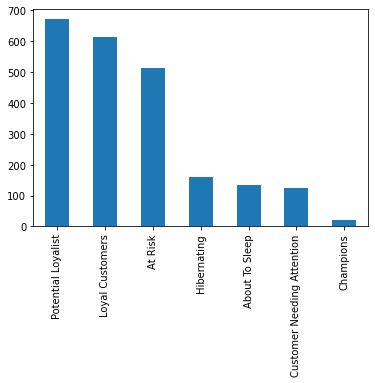

In [74]:
qwe.Customer_Segment.value_counts().plot.bar()